# GOA

In [107]:
import pandas as pd

# Load the datasets for Goa
df_go_enrolment = pd.read_csv('/content/Goa Enrolment State.csv')
df_go_demographic = pd.read_csv('/content/Goa Demographic State.csv')
df_go_biometric = pd.read_csv('/content/Goa Biometric State.csv')

print("Goa Enrolment Dataset:")
print(df_go_enrolment.head())
print(df_go_enrolment.info())
print(df_go_enrolment.describe())

print("\nGoa Demographic Dataset:")
print(df_go_demographic.head())
print(df_go_demographic.info())
print(df_go_demographic.describe())

print("\nGoa Biometric Dataset:")
print(df_go_biometric.head())
print(df_go_biometric.info())
print(df_go_biometric.describe())

Goa Enrolment Dataset:
         date state   district  pincode  age_0_5  age_5_17  age_18_greater
0  01-09-2025   Goa  North Goa   403006        1         1               0
1  01-09-2025   Goa  North Goa   403114        1         0               0
2  01-09-2025   Goa  North Goa   403512        1         0               0
3  01-09-2025   Goa  North Goa   403529        1         0               0
4  01-09-2025   Goa  South Goa   403406        1         0               0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            1871 non-null   object
 1   state           1871 non-null   object
 2   district        1871 non-null   object
 3   pincode         1871 non-null   int64 
 4   age_0_5         1871 non-null   int64 
 5   age_5_17        1871 non-null   int64 
 6   age_18_greater  1871 non-null   int64 
dtypes: int64(4), object(

In [108]:
df_go_enrolment['date'] = pd.to_datetime(df_go_enrolment['date'], format='%d-%m-%Y')
df_go_demographic['date'] = pd.to_datetime(df_go_demographic['date'], format='%d-%m-%Y')
df_go_biometric['date'] = pd.to_datetime(df_go_biometric['date'], format='%d-%m-%Y')

merged_go_df_temp = pd.merge(df_go_enrolment, df_go_demographic, on=['date', 'state', 'district', 'pincode'], how='outer')
df_merged_goa = pd.merge(merged_go_df_temp, df_go_biometric, on=['date', 'state', 'district', 'pincode'], how='outer')

# Identify numerical columns for NaN filling
numeric_cols = df_merged_goa.select_dtypes(include=['number']).columns

# Replace NaN values in numerical columns with 0
df_merged_goa[numeric_cols] = df_merged_goa[numeric_cols].fillna(0)

print("Data types after date conversion for df_go_enrolment:")
print(df_go_enrolment.info())
print("\nData types after date conversion for df_go_demographic:")
print(df_go_demographic.info())
print("\nData types after date conversion for df_go_biometric:")
print(df_go_biometric.info())

Data types after date conversion for df_go_enrolment:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1871 entries, 0 to 1870
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   date            1871 non-null   datetime64[ns]
 1   state           1871 non-null   object        
 2   district        1871 non-null   object        
 3   pincode         1871 non-null   int64         
 4   age_0_5         1871 non-null   int64         
 5   age_5_17        1871 non-null   int64         
 6   age_18_greater  1871 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 102.4+ KB
None

Data types after date conversion for df_go_demographic:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6947 entries, 0 to 6946
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           6947 non-nu

In [109]:
print("\nMerged Goa DataFrame (df_merged_goa) head:")
print(df_merged_goa.head())
print("\nMerged Goa DataFrame (df_merged_goa) info:")
print(df_merged_goa.info())
print("\nMerged Goa DataFrame (df_merged_goa) describe:")
print(df_merged_goa.describe())


Merged Goa DataFrame (df_merged_goa) head:
        date state   district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01   Goa  North Goa   403001      0.0       0.0             0.0   
1 2025-03-01   Goa  North Goa   403002      0.0       0.0             0.0   
2 2025-03-01   Goa  North Goa   403005      0.0       0.0             0.0   
3 2025-03-01   Goa  North Goa   403006      0.0       0.0             0.0   
4 2025-03-01   Goa  North Goa   403101      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0           20.0         150.0           0.0          0.0  
1           26.0         184.0          65.0        126.0  
2           23.0         141.0          41.0         97.0  
3           25.0         113.0           0.0          0.0  
4           14.0          78.0          34.0         66.0  

Merged Goa DataFrame (df_merged_goa) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16945 entries, 0 to 16944
Data columns 

In [110]:
df_go = df_merged_goa[df_merged_goa['state'] == 'Goa'].copy()
df_go['year'] = df_go['date'].dt.year
df_go['month'] = df_go['date'].dt.month

age_columns = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

df_go_agg = df_go.groupby(['year', 'month', 'state', 'district'])[age_columns].sum().reset_index()

print("Shape of df_go:", df_go.shape)
print("\nFirst 5 rows of df_go with new 'year' and 'month' columns:")
print(df_go.head())

Shape of df_go: (16945, 13)

First 5 rows of df_go with new 'year' and 'month' columns:
        date state   district  pincode  age_0_5  age_5_17  age_18_greater  \
0 2025-03-01   Goa  North Goa   403001      0.0       0.0             0.0   
1 2025-03-01   Goa  North Goa   403002      0.0       0.0             0.0   
2 2025-03-01   Goa  North Goa   403005      0.0       0.0             0.0   
3 2025-03-01   Goa  North Goa   403006      0.0       0.0             0.0   
4 2025-03-01   Goa  North Goa   403101      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  year  month  
0           20.0         150.0           0.0          0.0  2025      3  
1           26.0         184.0          65.0        126.0  2025      3  
2           23.0         141.0          41.0         97.0  2025      3  
3           25.0         113.0           0.0          0.0  2025      3  
4           14.0          78.0          34.0         66.0  2025      3  


In [111]:
print("\nAggregated DataFrame (df_go_agg) head:")
print(df_go_agg.head())
print("\nAggregated DataFrame (df_go_agg) info:")
print(df_go_agg.info())


Aggregated DataFrame (df_go_agg) head:
   year  month state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3   Goa  North Goa      0.0       0.0             0.0   
1  2025      3   Goa  South Goa      0.0       0.0             0.0   
2  2025      4   Goa  North Goa      0.0       0.0             0.0   
3  2025      4   Goa  South Goa      0.0       0.0             0.0   
4  2025      5   Goa     Bardez      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  
0          676.0        3599.0        1569.0       2165.0  
1          853.0        4251.0        2654.0       2902.0  
2            0.0           0.0        2374.0       2787.0  
3            0.0           0.0        2345.0       1925.0  
4            0.0           0.0           3.0          5.0  

Aggregated DataFrame (df_go_agg) info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 11 columns):
 #   Column          Non-Null Count 

In [112]:
import numpy as np

# 1. Create 'totalenrolments' column
df_go_agg['totalenrolments'] = df_go_agg['age_0_5'] + df_go_agg['age_5_17'] + df_go_agg['age_18_greater']

# 2. Create 'childenrolments' column
df_go_agg['childenrolments'] = df_go_agg['age_0_5'] + df_go_agg['age_5_17']

# 3. Create 'totaldemoupdates' column
df_go_agg['totaldemoupdates'] = df_go_agg['demo_age_5_17'] + df_go_agg['demo_age_17_']

# 4. Create 'totalbioupdates' column
df_go_agg['totalbioupdates'] = df_go_agg['bio_age_5_17'] + df_go_agg['bio_age_17_']

# 5. Calculate 'CES' (Child Enrolment Score) with division by zero handling
df_go_agg['CES'] = np.where(
    df_go_agg['totalenrolments'] == 0,
    0,
    df_go_agg['childenrolments'] / df_go_agg['totalenrolments']
)

# 6. Calculate 'DUR' (Demographic Update Rate) with division by zero handling
df_go_agg['DUR'] = np.where(
    df_go_agg['totalenrolments'] == 0,
    0,
    df_go_agg['totaldemoupdates'] / df_go_agg['totalenrolments']
)

# 7. Calculate 'BUR' (Biometric Update Rate) with division by zero handling
df_go_agg['BUR'] = np.where(
    df_go_agg['totalenrolments'] == 0,
    0,
    df_go_agg['totalbioupdates'] / df_go_agg['totalenrolments']
)

# 8. Display the head of the DataFrame
print("Aggregated DataFrame (df_go_agg) with new metrics head:")
print(df_go_agg.head())

Aggregated DataFrame (df_go_agg) with new metrics head:
   year  month state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3   Goa  North Goa      0.0       0.0             0.0   
1  2025      3   Goa  South Goa      0.0       0.0             0.0   
2  2025      4   Goa  North Goa      0.0       0.0             0.0   
3  2025      4   Goa  South Goa      0.0       0.0             0.0   
4  2025      5   Goa     Bardez      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  bio_age_17_  totalenrolments  \
0          676.0        3599.0        1569.0       2165.0              0.0   
1          853.0        4251.0        2654.0       2902.0              0.0   
2            0.0           0.0        2374.0       2787.0              0.0   
3            0.0           0.0        2345.0       1925.0              0.0   
4            0.0           0.0           3.0          5.0              0.0   

   childenrolments  totaldemoupdates  totalbioupdates 

In [113]:
def min_max_normalize(series):
    min_val = series.min()
    max_val = series.max()
    if max_val == min_val:
        return 0  # Handle division by zero case
    return (series - min_val) / (max_val - min_val)

# Apply min-max normalization to 'totalenrolments', grouped by 'year' and 'state'
df_go_agg['Enorm'] = df_go_agg.groupby(['year', 'state'])['totalenrolments'].transform(min_max_normalize)

# Apply min-max normalization to 'totaldemoupdates', grouped by 'year' and 'state'
df_go_agg['Dnorm'] = df_go_agg.groupby(['year', 'state'])['totaldemoupdates'].transform(min_max_normalize)

# Apply min-max normalization to 'totalbioupdates', grouped by 'year', and 'state'
df_go_agg['Bnorm'] = df_go_agg.groupby(['year', 'state'])['totalbioupdates'].transform(min_max_normalize)

# Calculate 'stdnorm' by combining the normalized metrics
df_go_agg['stdnorm'] = (df_go_agg['Enorm'] + df_go_agg['Dnorm'] + df_go_agg['Bnorm']) / 3

# Compute 'ALBI' (Aadhaar Lifecycle Balance Index) as 1 - stdnorm
df_go_agg['ALBI'] = 1 - df_go_agg['stdnorm']

# Clip the values in the 'ALBI' column to ensure they are between 0 and 1
df_go_agg['ALBI'] = df_go_agg['ALBI'].clip(lower=0, upper=1)

# Display the head of the DataFrame to show the newly created columns
print("Aggregated DataFrame (df_go_agg) with normalized metrics and ALBI head:")
print(df_go_agg.head())

Aggregated DataFrame (df_go_agg) with normalized metrics and ALBI head:
   year  month state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3   Goa  North Goa      0.0       0.0             0.0   
1  2025      3   Goa  South Goa      0.0       0.0             0.0   
2  2025      4   Goa  North Goa      0.0       0.0             0.0   
3  2025      4   Goa  South Goa      0.0       0.0             0.0   
4  2025      5   Goa     Bardez      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...  totaldemoupdates  \
0          676.0        3599.0        1569.0  ...            4275.0   
1          853.0        4251.0        2654.0  ...            5104.0   
2            0.0           0.0        2374.0  ...               0.0   
3            0.0           0.0        2345.0  ...               0.0   
4            0.0           0.0           3.0  ...               0.0   

   totalbioupdates  CES  DUR  BUR  Enorm     Dnorm     Bnorm   stdnorm  \
0     

In [114]:
df_go_agg['Enormrisk'] = 1 - df_go_agg['Enorm']
df_go_agg['CESrisknorm'] = 1 - df_go_agg['CES']
df_go_agg['DURrisknorm'] = 1 - df_go_agg['DUR']
df_go_agg['BURrisknorm'] = 1 - df_go_agg['BUR']
df_go_agg['ALBIrisknorm'] = 1 - df_go_agg['ALBI']

# Calculate the 'riskscore' by summing the risk components, averaging, and scaling to 0-100
df_go_agg['riskscore'] = (
    df_go_agg['Enormrisk'] +
    df_go_agg['CESrisknorm'] +
    df_go_agg['DURrisknorm'] +
    df_go_agg['BURrisknorm'] +
    df_go_agg['ALBIrisknorm']
) / 5 * 100

# Display the head of the DataFrame to show the newly created risk-related columns
print("Aggregated DataFrame (df_go_agg) with risk components and riskscore head:")
print(df_go_agg.head())

Aggregated DataFrame (df_go_agg) with risk components and riskscore head:
   year  month state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3   Goa  North Goa      0.0       0.0             0.0   
1  2025      3   Goa  South Goa      0.0       0.0             0.0   
2  2025      4   Goa  North Goa      0.0       0.0             0.0   
3  2025      4   Goa  South Goa      0.0       0.0             0.0   
4  2025      5   Goa     Bardez      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Dnorm     Bnorm  \
0          676.0        3599.0        1569.0  ...  0.760947  0.496939   
1          853.0        4251.0        2654.0  ...  0.908508  0.739420   
2            0.0           0.0        2374.0  ...  0.000000  0.686851   
3            0.0           0.0        2345.0  ...  0.000000  0.568273   
4            0.0           0.0           3.0  ...  0.000000  0.001065   

    stdnorm      ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURris

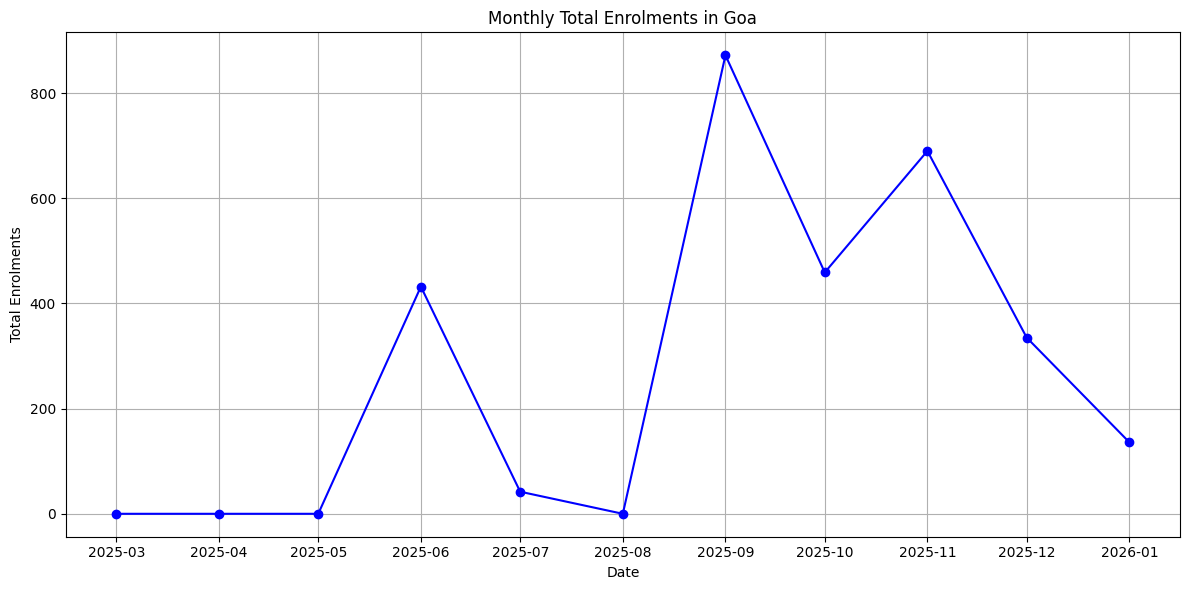

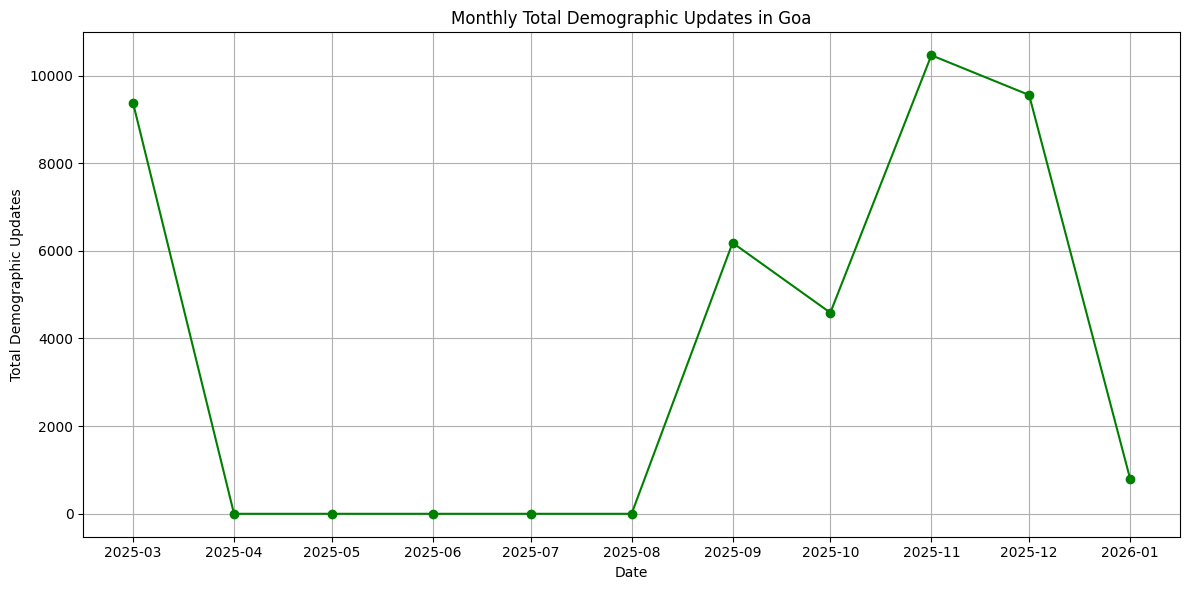

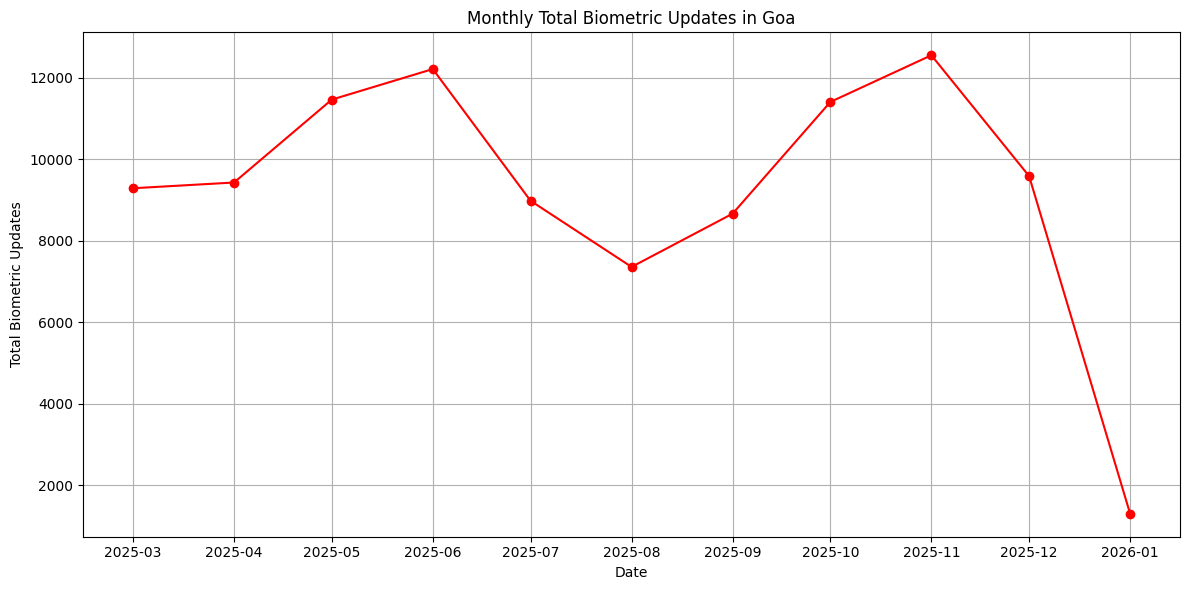

Monthly trend plots generated successfully for Goa.


In [115]:
import matplotlib.pyplot as plt
import seaborn as sns

df_go_monthly_trends = df_go_agg.groupby(['year', 'month']).agg({
    'totalenrolments': 'sum',
    'totaldemoupdates': 'sum',
    'totalbioupdates': 'sum'
}).reset_index()

# Create a date column for plotting
df_go_monthly_trends['date'] = pd.to_datetime(df_go_monthly_trends['year'].astype(str) + '-' + df_go_monthly_trends['month'].astype(str) + '-01')

# Sort by date to ensure proper trend plotting
df_go_monthly_trends = df_go_monthly_trends.sort_values(by='date')

# Plotting totalenrolments monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_go_monthly_trends['date'], df_go_monthly_trends['totalenrolments'], marker='o', linestyle='-', color='blue')
plt.xlabel('Date')
plt.ylabel('Total Enrolments')
plt.title('Monthly Total Enrolments in Goa')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totaldemoupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_go_monthly_trends['date'], df_go_monthly_trends['totaldemoupdates'], marker='o', linestyle='-', color='green')
plt.xlabel('Date')
plt.ylabel('Total Demographic Updates')
plt.title('Monthly Total Demographic Updates in Goa')
plt.grid(True)
plt.tight_layout()
plt.show()

# Plotting totalbioupdates monthly trend
plt.figure(figsize=(12, 6))
plt.plot(df_go_monthly_trends['date'], df_go_monthly_trends['totalbioupdates'], marker='o', linestyle='-', color='red')
plt.xlabel('Date')
plt.ylabel('Total Biometric Updates')
plt.title('Monthly Total Biometric Updates in Goa')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Monthly trend plots generated successfully for Goa.")

 **Univariate Analysis for Goa**

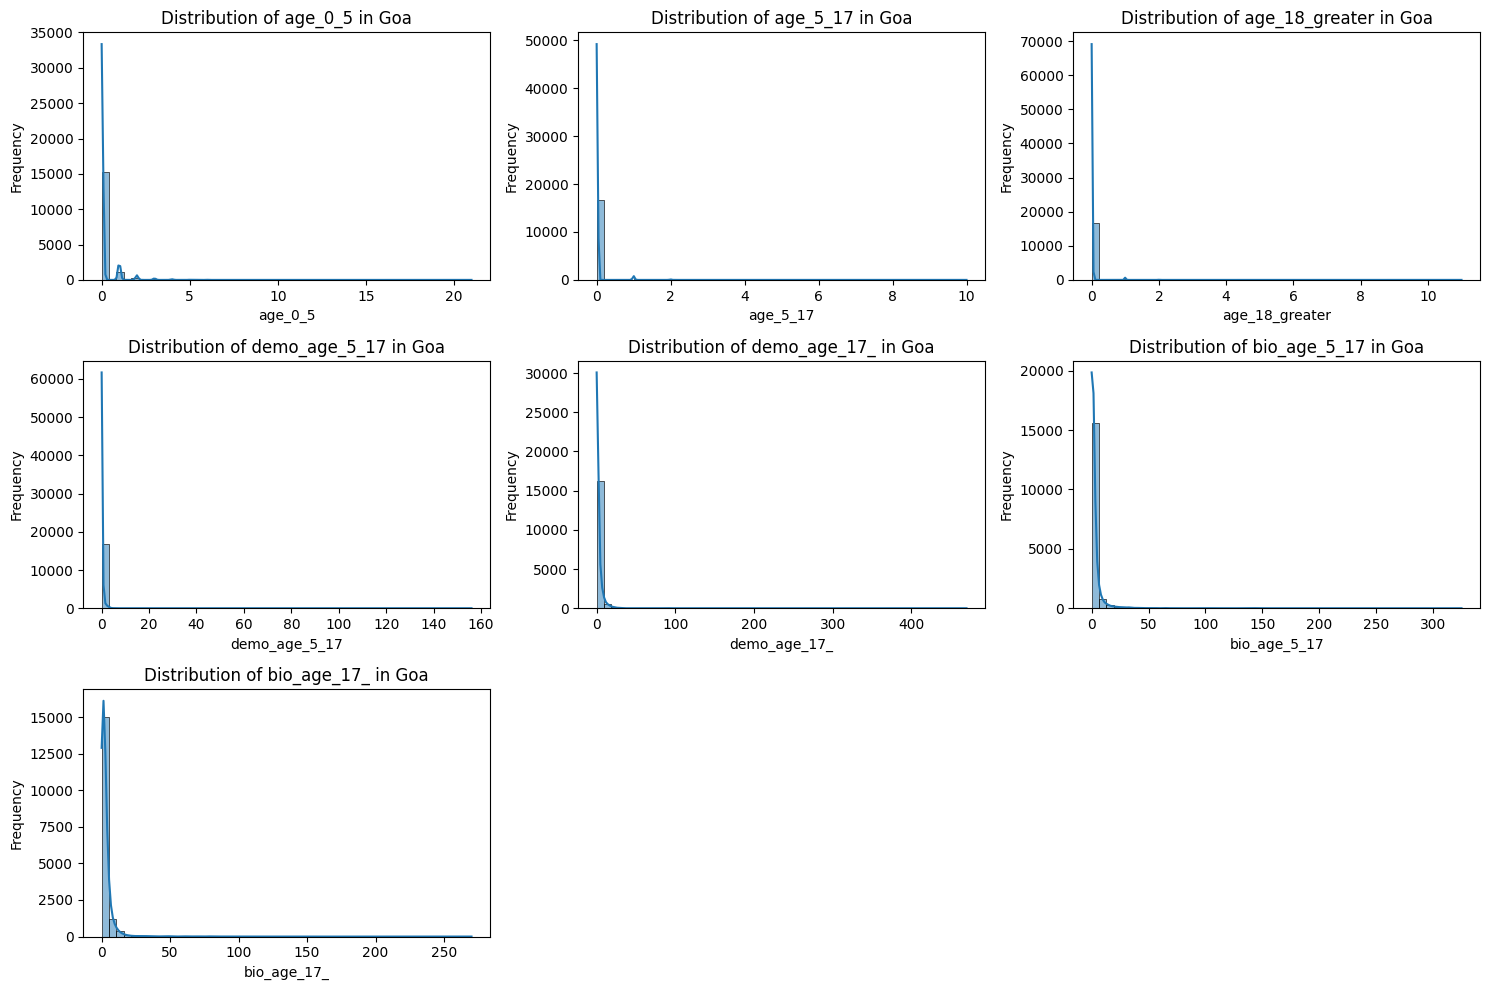

Histograms for numerical age-related columns of df_merged_goa displayed.


In [116]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Histograms for numerical age-related columns in df_merged_goa
numerical_age_cols_goa = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_age_cols_goa):
    plt.subplot(3, 3, i + 1) # Arrange plots in a 3x3 grid
    sns.histplot(df_merged_goa[col], bins=50, kde=True)
    plt.title(f'Distribution of {col} in Goa')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

print("Histograms for numerical age-related columns of df_merged_goa displayed.")

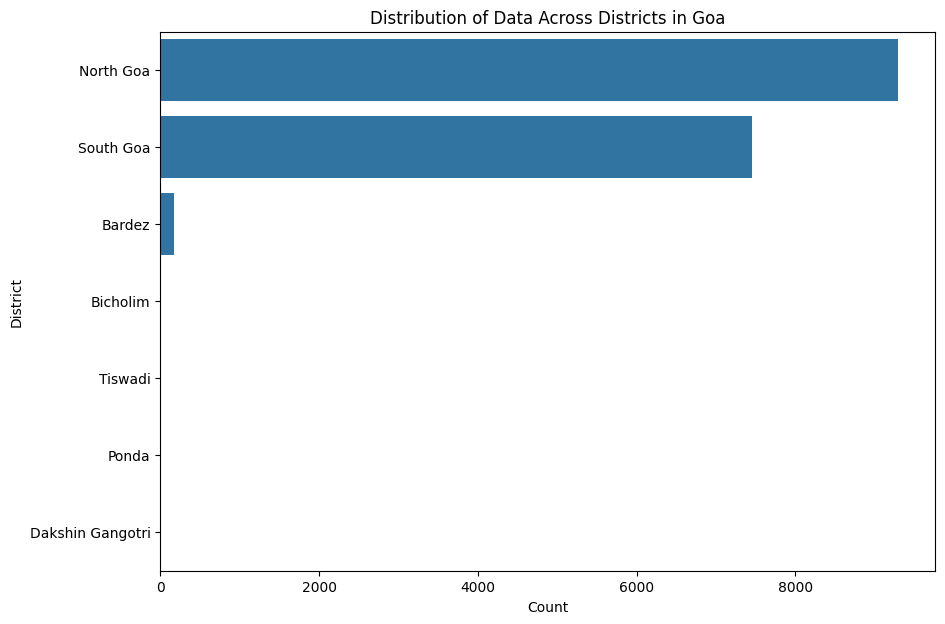

Count plot for 'district' in df_merged_goa displayed.


In [126]:
# 2. Count plot for the 'district' column in df_merged_goa
plt.figure(figsize=(10, 7))
sns.countplot(data=df_merged_goa, y='district', order=df_merged_goa['district'].value_counts().index)
plt.title('Distribution of Data Across Districts in Goa')
plt.xlabel('Count')
plt.ylabel('District')
plt.show()

print("Count plot for 'district' in df_merged_goa displayed.")

**Bivariate and Trivariate Analysis for Goa**


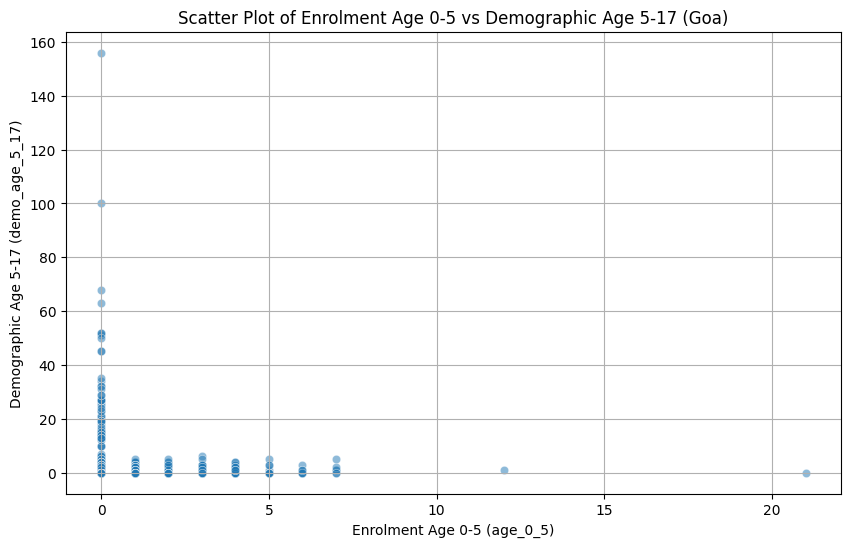

Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Goa.


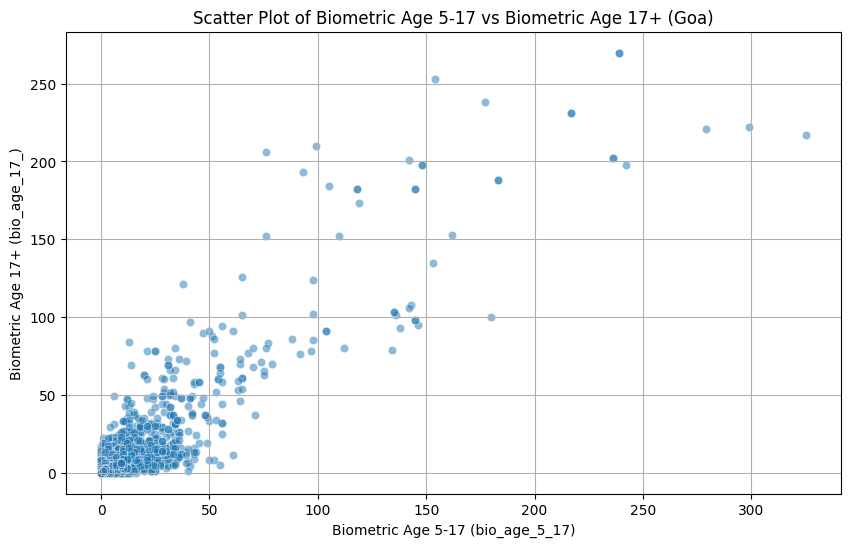

Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Goa.


In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter plot of age_0_5 vs demo_age_5_17 from df_merged_goa
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_goa, x='age_0_5', y='demo_age_5_17', alpha=0.5)
plt.title('Scatter Plot of Enrolment Age 0-5 vs Demographic Age 5-17 (Goa)')
plt.xlabel('Enrolment Age 0-5 (age_0_5)')
plt.ylabel('Demographic Age 5-17 (demo_age_5_17)')
plt.grid(True)
plt.show()

print("Scatter plot for 'age_0_5' vs 'demo_age_5_17' displayed for Goa.")

# 2. Scatter plot of bio_age_5_17 vs bio_age_17_ from df_merged_goa
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_merged_goa, x='bio_age_5_17', y='bio_age_17_', alpha=0.5)
plt.title('Scatter Plot of Biometric Age 5-17 vs Biometric Age 17+ (Goa)')
plt.xlabel('Biometric Age 5-17 (bio_age_5_17)')
plt.ylabel('Biometric Age 17+ (bio_age_17_)')
plt.grid(True)
plt.show()

print("Scatter plot for 'bio_age_5_17' vs 'bio_age_17_' displayed for Goa.")


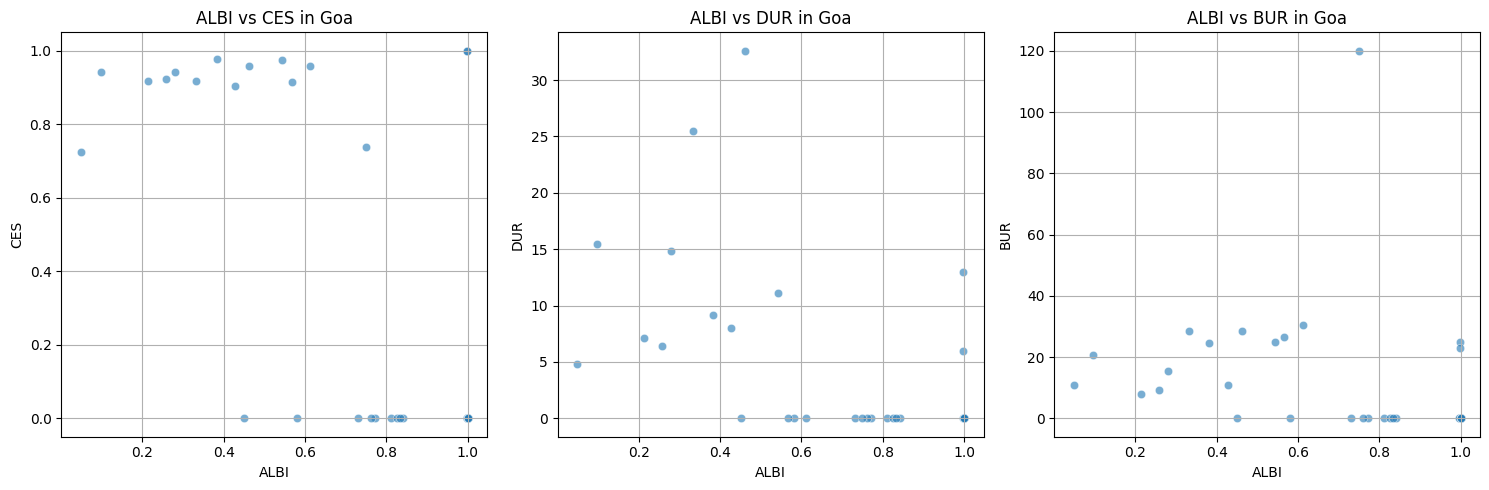

Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR displayed for Goa.


In [128]:
# 3. Scatter plots comparing ALBI with CES, DUR, and BUR from df_go_agg
metrics_for_albi_scatter = ['CES', 'DUR', 'BUR']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(metrics_for_albi_scatter):
    plt.subplot(1, 3, i + 1)
    sns.scatterplot(data=df_go_agg, x='ALBI', y=metric, alpha=0.6)
    plt.title(f'ALBI vs {metric} in Goa')
    plt.xlabel('ALBI')
    plt.ylabel(metric)
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Bivariate analysis scatter plots for ALBI vs CES, DUR, BUR displayed for Goa.")

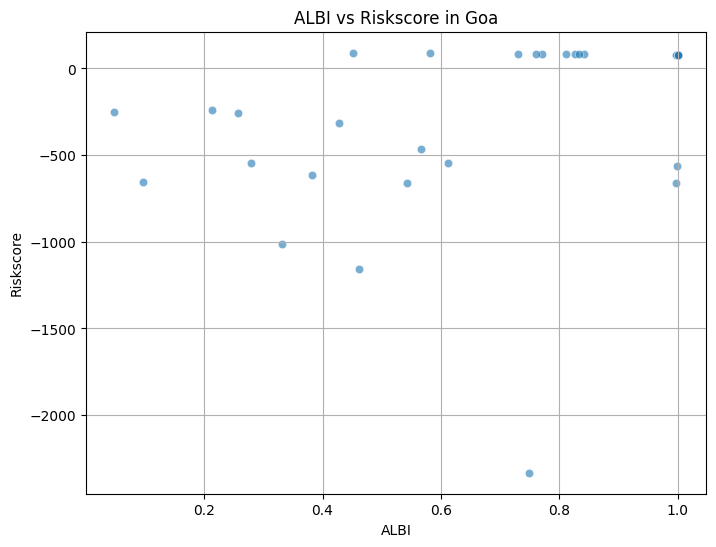

Scatter plot for ALBI vs Riskscore displayed for Goa.


In [127]:
# 4. Scatter plot of ALBI vs riskscore from df_go_agg
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_go_agg, x='ALBI', y='riskscore', alpha=0.6)
plt.title('ALBI vs Riskscore in Goa')
plt.xlabel('ALBI')
plt.ylabel('Riskscore')
plt.grid(True)
plt.show()

print("Scatter plot for ALBI vs Riskscore displayed for Goa.")

Correlation Matrix for Goa:
                 age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
age_0_5         1.000000  0.236658        0.219963       0.030657   
age_5_17        0.236658  1.000000        0.295362       0.011320   
age_18_greater  0.219963  0.295362        1.000000       0.003068   
demo_age_5_17   0.030657  0.011320        0.003068       1.000000   
demo_age_17_    0.088354  0.032209        0.016524       0.874039   
bio_age_5_17    0.063641  0.016027        0.004329       0.427155   
bio_age_17_     0.034657  0.016478        0.002849       0.385689   

                demo_age_17_  bio_age_5_17  bio_age_17_  
age_0_5             0.088354      0.063641     0.034657  
age_5_17            0.032209      0.016027     0.016478  
age_18_greater      0.016524      0.004329     0.002849  
demo_age_5_17       0.874039      0.427155     0.385689  
demo_age_17_        1.000000      0.431765     0.404611  
bio_age_5_17        0.431765      1.000000     0.886722  
bio_age_17_  

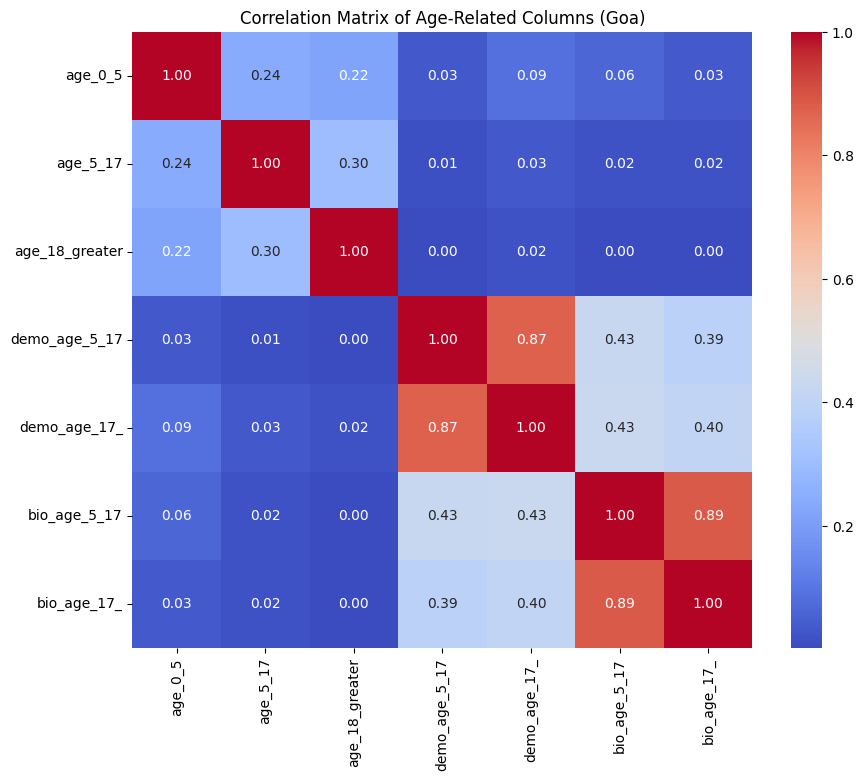

Correlation matrix heatmap for age-related columns displayed for Goa.


In [129]:
# 5. Correlation matrix (heatmap) for all numerical age-related columns from df_merged_goa
numerical_age_cols = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']
correlation_matrix_goa = df_merged_goa[numerical_age_cols].corr()

print("Correlation Matrix for Goa:")
print(correlation_matrix_goa)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_goa, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Age-Related Columns (Goa)')
plt.show()

print("Correlation matrix heatmap for age-related columns displayed for Goa.")

Top 7 districts by total average age-related counts for Goa:
           district  total_avg_age
5         South Goa       9.121245
3         North Goa       8.381587
6           Tiswadi       1.625000
0            Bardez       1.294798
1          Bicholim       1.000000
2  Dakshin Gangotri       1.000000
4             Ponda       1.000000


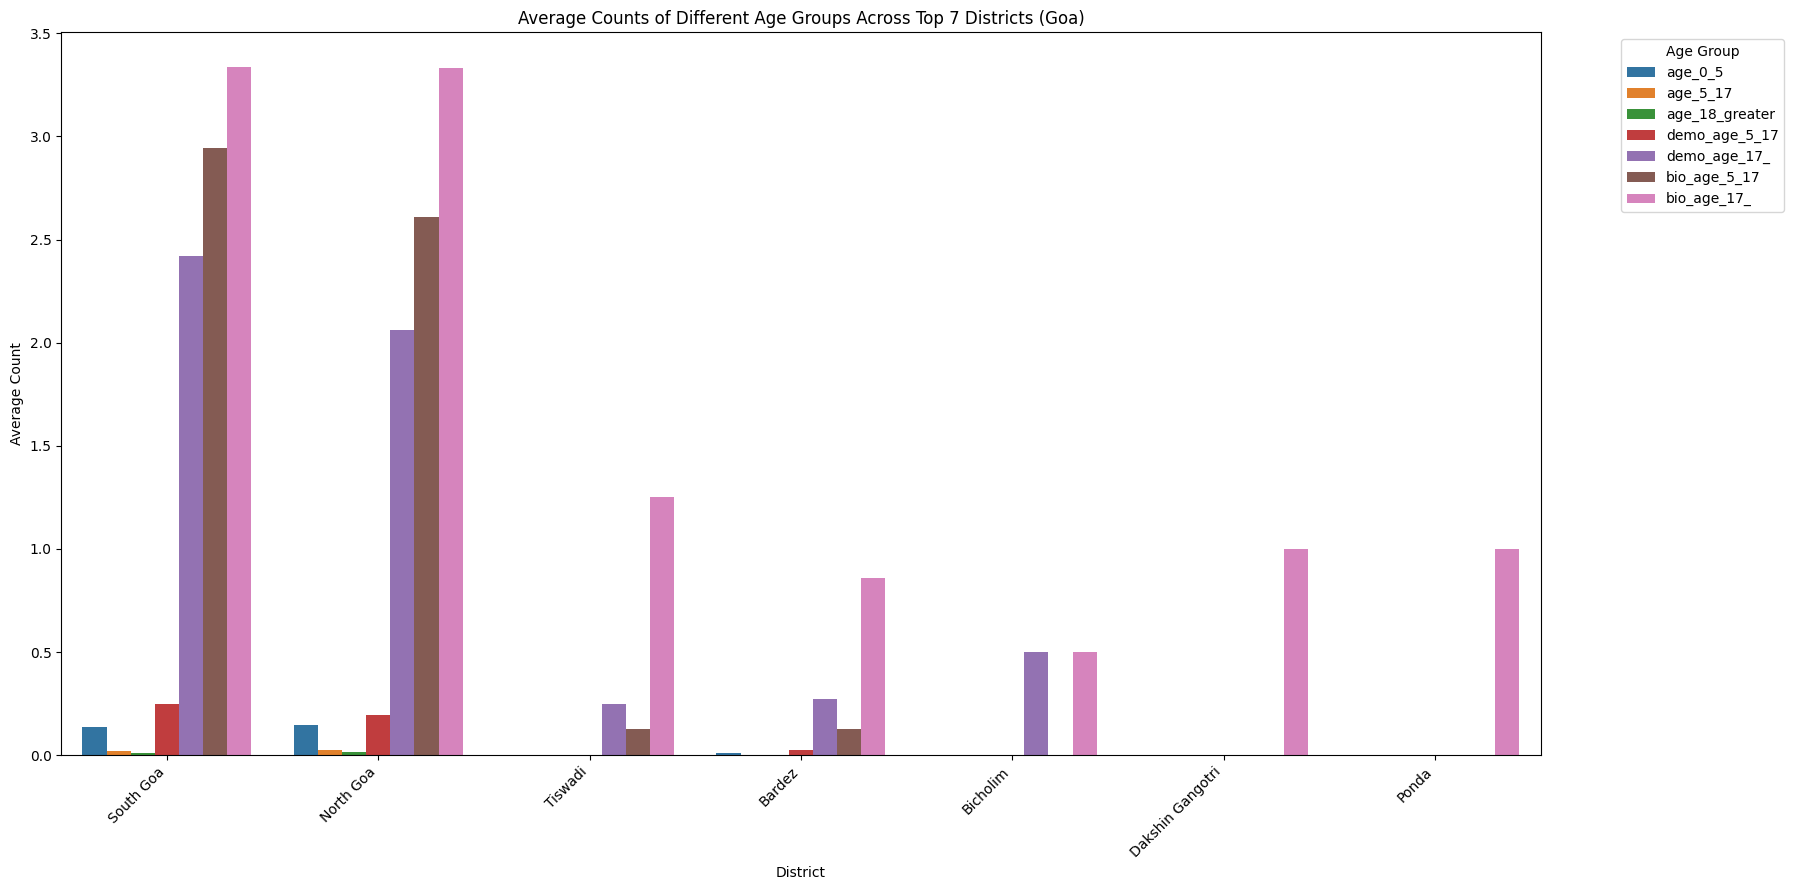

Insight: The grouped bar chart visually represents the distribution of average enrolment, demographic, and biometric counts across the top districts in Goa, providing insights into their overall activity and the relative contribution of each age group.


In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the age-related columns for grouping and sum
age_cols_to_group_goa = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# Group by district and calculate the mean of age-related columns
df_go_district_mean = df_merged_goa.groupby('district')[age_cols_to_group_goa].mean().reset_index()

# Calculate total_avg_age for each district
df_go_district_mean['total_avg_age'] = df_go_district_mean[age_cols_to_group_goa].sum(axis=1)

# Get the top 10 districts based on 'total_avg_age'
# Goa has only two main districts as per the data (North Goa, South Goa) and some sub-districts/talukas that might appear as districts.
# We will select the top available distinct districts based on total_avg_age.
num_districts_goa = df_go_district_mean['district'].nunique()
top_n = min(10, num_districts_goa)
df_go_district_mean_topn = df_go_district_mean.nlargest(top_n, 'total_avg_age')

print(f"Top {top_n} districts by total average age-related counts for Goa:")
print(df_go_district_mean_topn[['district', 'total_avg_age']])

# Melt the DataFrame for grouped bar chart plotting
df_go_district_mean_melted = df_go_district_mean_topn.melt(
    id_vars=['district'],
    value_vars=age_cols_to_group_goa,
    var_name='Age Group',
    value_name='Average Count'
)

# Create the grouped bar chart
plt.figure(figsize=(18, 9))
sns.barplot(data=df_go_district_mean_melted, x='district', y='Average Count', hue='Age Group', palette='tab10')
plt.title(f'Average Counts of Different Age Groups Across Top {top_n} Districts (Goa)')
plt.xlabel('District')
plt.ylabel('Average Count')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

print("Insight: The grouped bar chart visually represents the distribution of average enrolment, demographic, and biometric counts across the top districts in Goa, providing insights into their overall activity and the relative contribution of each age group.")

Time-series aggregated data (sum of age-related columns per date) for Goa:
   year  month  age_0_5  age_5_17  age_18_greater  demo_age_5_17  \
0  2025      3      0.0       0.0             0.0         1529.0   
1  2025      4      0.0       0.0             0.0            0.0   
2  2025      5      0.0       0.0             0.0            0.0   
3  2025      6    309.0      95.0            28.0            0.0   
4  2025      7     21.0      10.0            11.0            0.0   

   demo_age_17_  bio_age_5_17  bio_age_17_       date  
0        7850.0        4223.0       5067.0 2025-03-01  
1           0.0        4719.0       4712.0 2025-04-01  
2           0.0        5268.0       6199.0 2025-05-01  
3           0.0        3815.0       8402.0 2025-06-01  
4           0.0        2587.0       6395.0 2025-07-01  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          ----

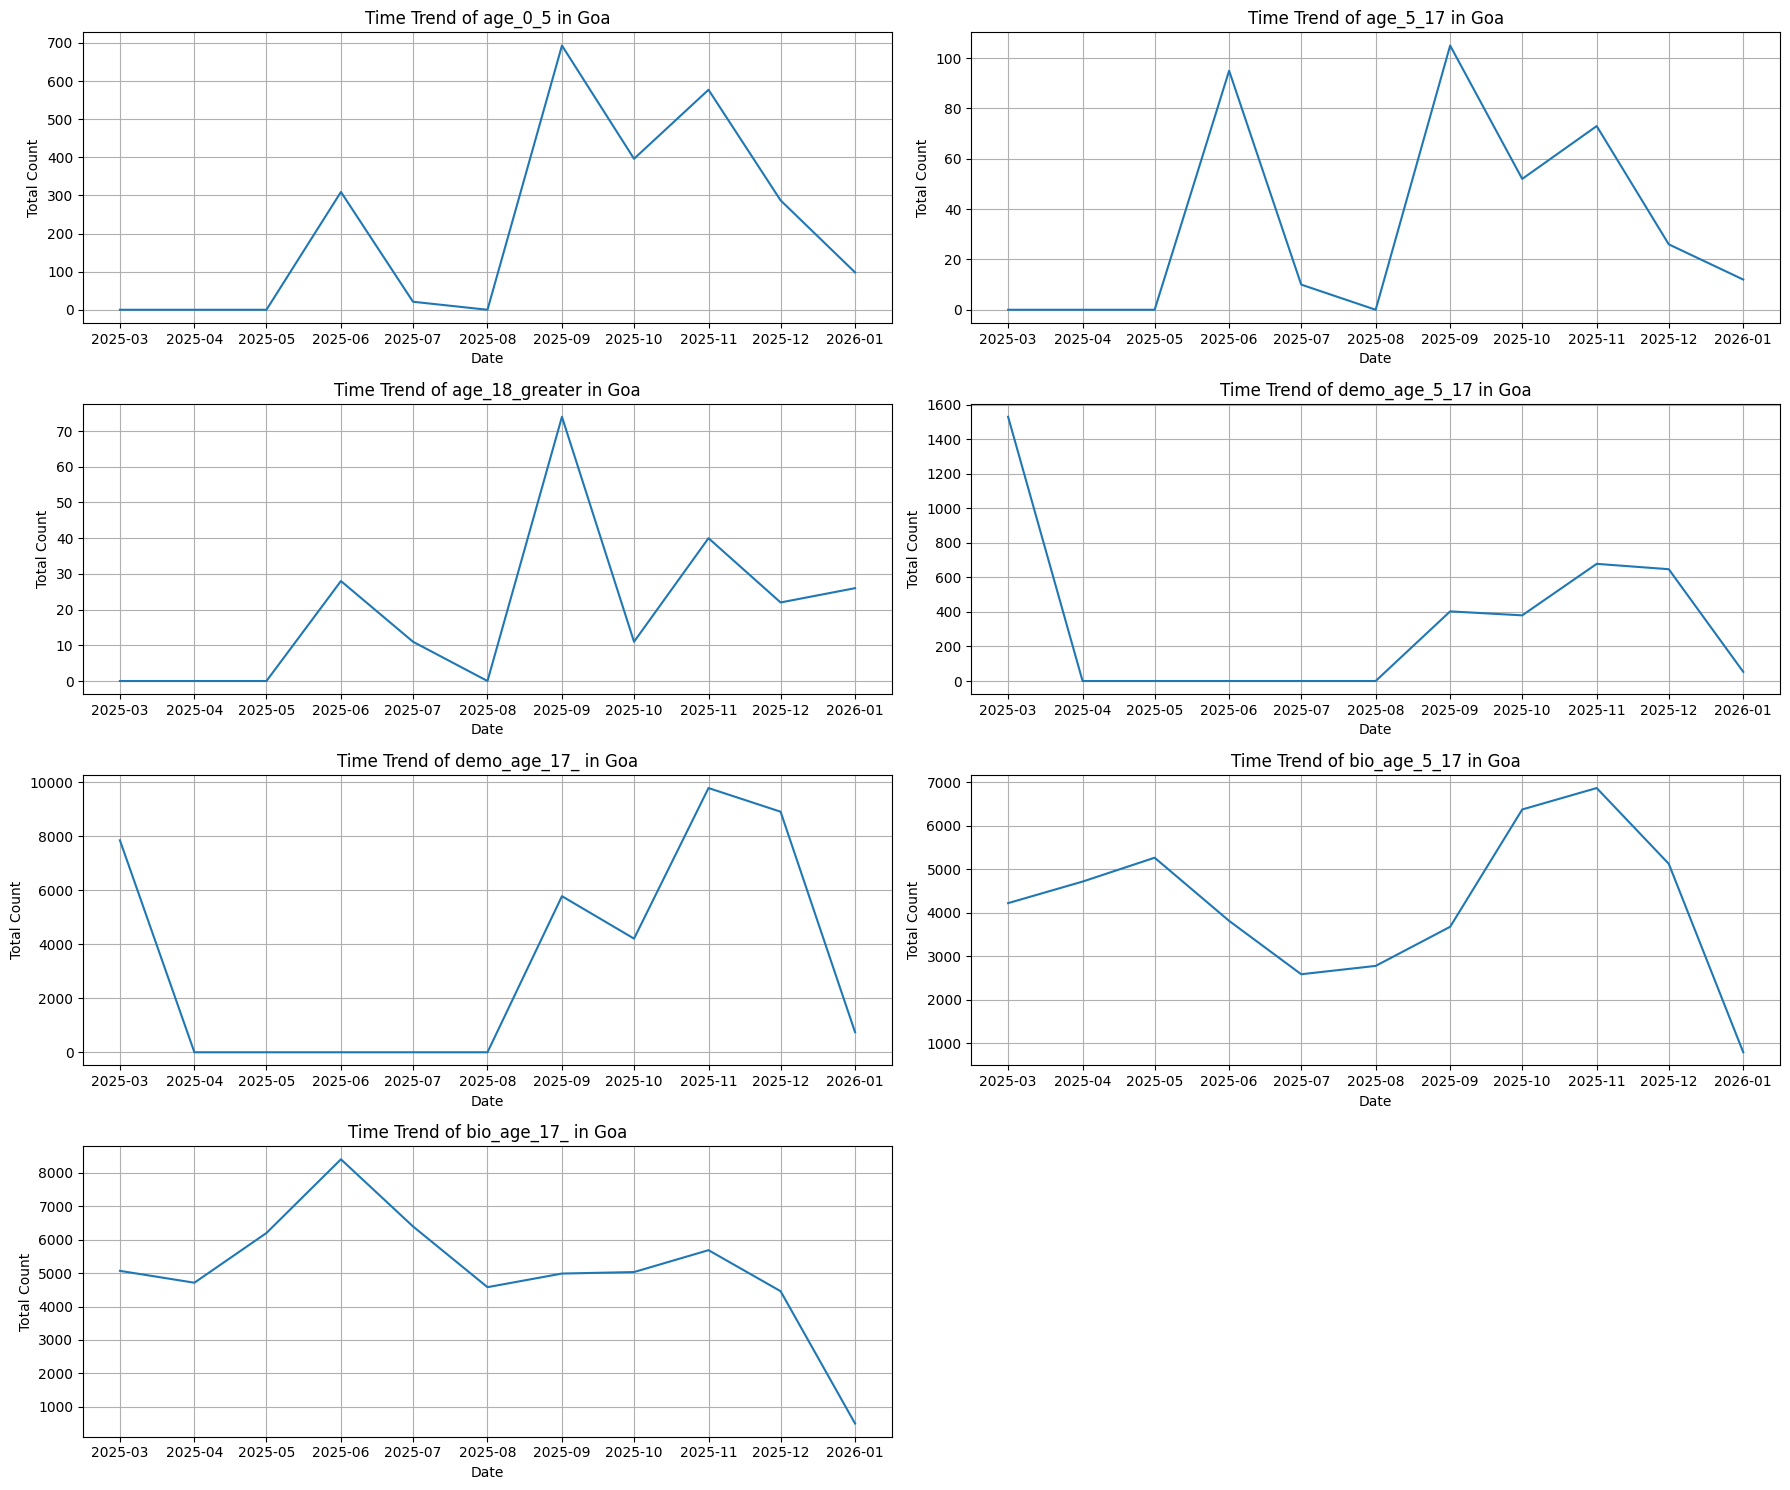

Insight: Line charts for each age-related column over time in Goa provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.


In [131]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Define a list named `age_cols_to_group_goa` containing the age-related column names
age_cols_to_group_goa = ['age_0_5', 'age_5_17', 'age_18_greater', 'demo_age_5_17', 'demo_age_17_', 'bio_age_5_17', 'bio_age_17_']

# 2. Group `df_go_agg` by 'year' and 'month', and sum the columns in `age_cols_to_group_goa`. Reset the index.
df_go_time_trend = df_go_agg.groupby(['year', 'month'])[age_cols_to_group_goa].sum().reset_index()

# 3. Create a new 'date' column in `df_go_time_trend`
df_go_time_trend['date'] = pd.to_datetime(df_go_time_trend['year'].astype(str) + '-' + df_go_time_trend['month'].astype(str) + '-01')

# 4. Sort `df_go_time_trend` by the newly created 'date' column
df_go_time_trend = df_go_time_trend.sort_values(by='date')

print("Time-series aggregated data (sum of age-related columns per date) for Goa:")
print(df_go_time_trend.head())
print(df_go_time_trend.info())

# 5. Iterate through each column in `age_cols_to_group_goa` and create line plots
plt.figure(figsize=(18, 15))
for i, col in enumerate(age_cols_to_group_goa):
    plt.subplot(4, 2, i + 1) # Adjust subplot grid based on number of columns
    sns.lineplot(data=df_go_time_trend, x='date', y=col)
    plt.title(f'Time Trend of {col} in Goa')
    plt.xlabel('Date')
    plt.ylabel('Total Count')
    plt.grid(True)
plt.tight_layout()
plt.show()

print("Insight: Line charts for each age-related column over time in Goa provide a clear visualization of their temporal trends, allowing for the identification of periods of high/low activity or significant changes.")

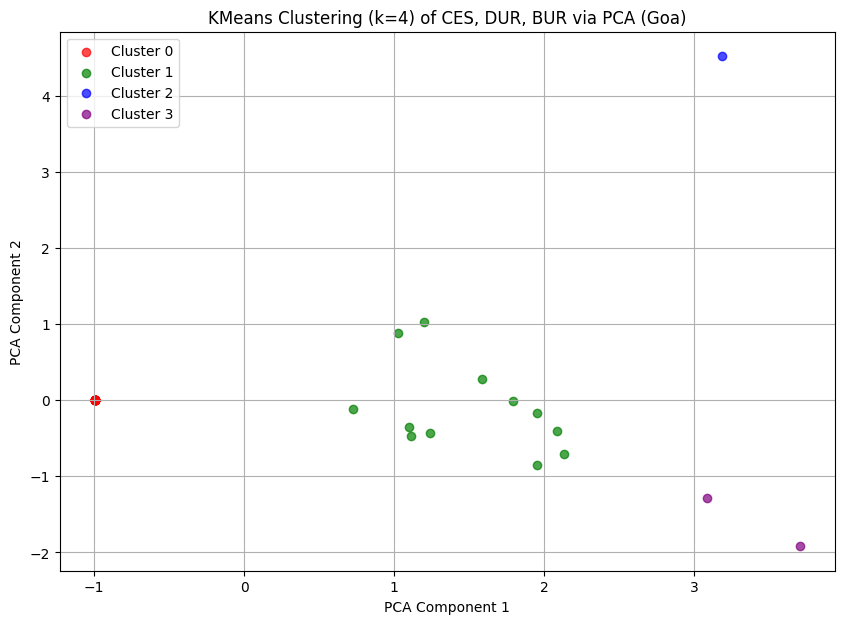

First 5 rows of df_go_agg with 'clusterlabel' column:
   year  month state   district  age_0_5  age_5_17  age_18_greater  \
0  2025      3   Goa  North Goa      0.0       0.0             0.0   
1  2025      3   Goa  South Goa      0.0       0.0             0.0   
2  2025      4   Goa  North Goa      0.0       0.0             0.0   
3  2025      4   Goa  South Goa      0.0       0.0             0.0   
4  2025      5   Goa     Bardez      0.0       0.0             0.0   

   demo_age_5_17  demo_age_17_  bio_age_5_17  ...     Bnorm   stdnorm  \
0          676.0        3599.0        1569.0  ...  0.496939  0.419295   
1          853.0        4251.0        2654.0  ...  0.739420  0.549309   
2            0.0           0.0        2374.0  ...  0.686851  0.228950   
3            0.0           0.0        2345.0  ...  0.568273  0.189424   
4            0.0           0.0           3.0  ...  0.001065  0.000355   

       ALBI  Enormrisk  CESrisknorm  DURrisknorm  BURrisknorm  ALBIrisknorm  \
0  0.58

In [123]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# 1. Select the columns for clustering
features_for_clustering = df_go_agg[['CES', 'DUR', 'BUR']]

# 2. Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features_for_clustering)

# 3. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10) # Added n_init=10 for newer sklearn versions
kmeans.fit(scaled_features)

# 4. Add the cluster labels to df_go_agg
df_go_agg['clusterlabel'] = kmeans.labels_

# 5. Apply PCA for dimensionality reduction
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for PCA components for easier plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA Component 1', 'PCA Component 2'])
pca_df['clusterlabel'] = df_go_agg['clusterlabel']

# 6. Generate a PCA scatter plot to visualize these clusters
plt.figure(figsize=(10, 7))
colors = ['red', 'green', 'blue', 'purple']

for i in range(4):
    plt.scatter(
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 1'],
        pca_df[pca_df['clusterlabel'] == i]['PCA Component 2'],
        c=colors[i],
        label=f'Cluster {i}',
        alpha=0.7
    )

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering (k=4) of CES, DUR, BUR via PCA (Goa)')
plt.legend()
plt.grid(True)
plt.show()

print("First 5 rows of df_go_agg with 'clusterlabel' column:")
print(df_go_agg.head())

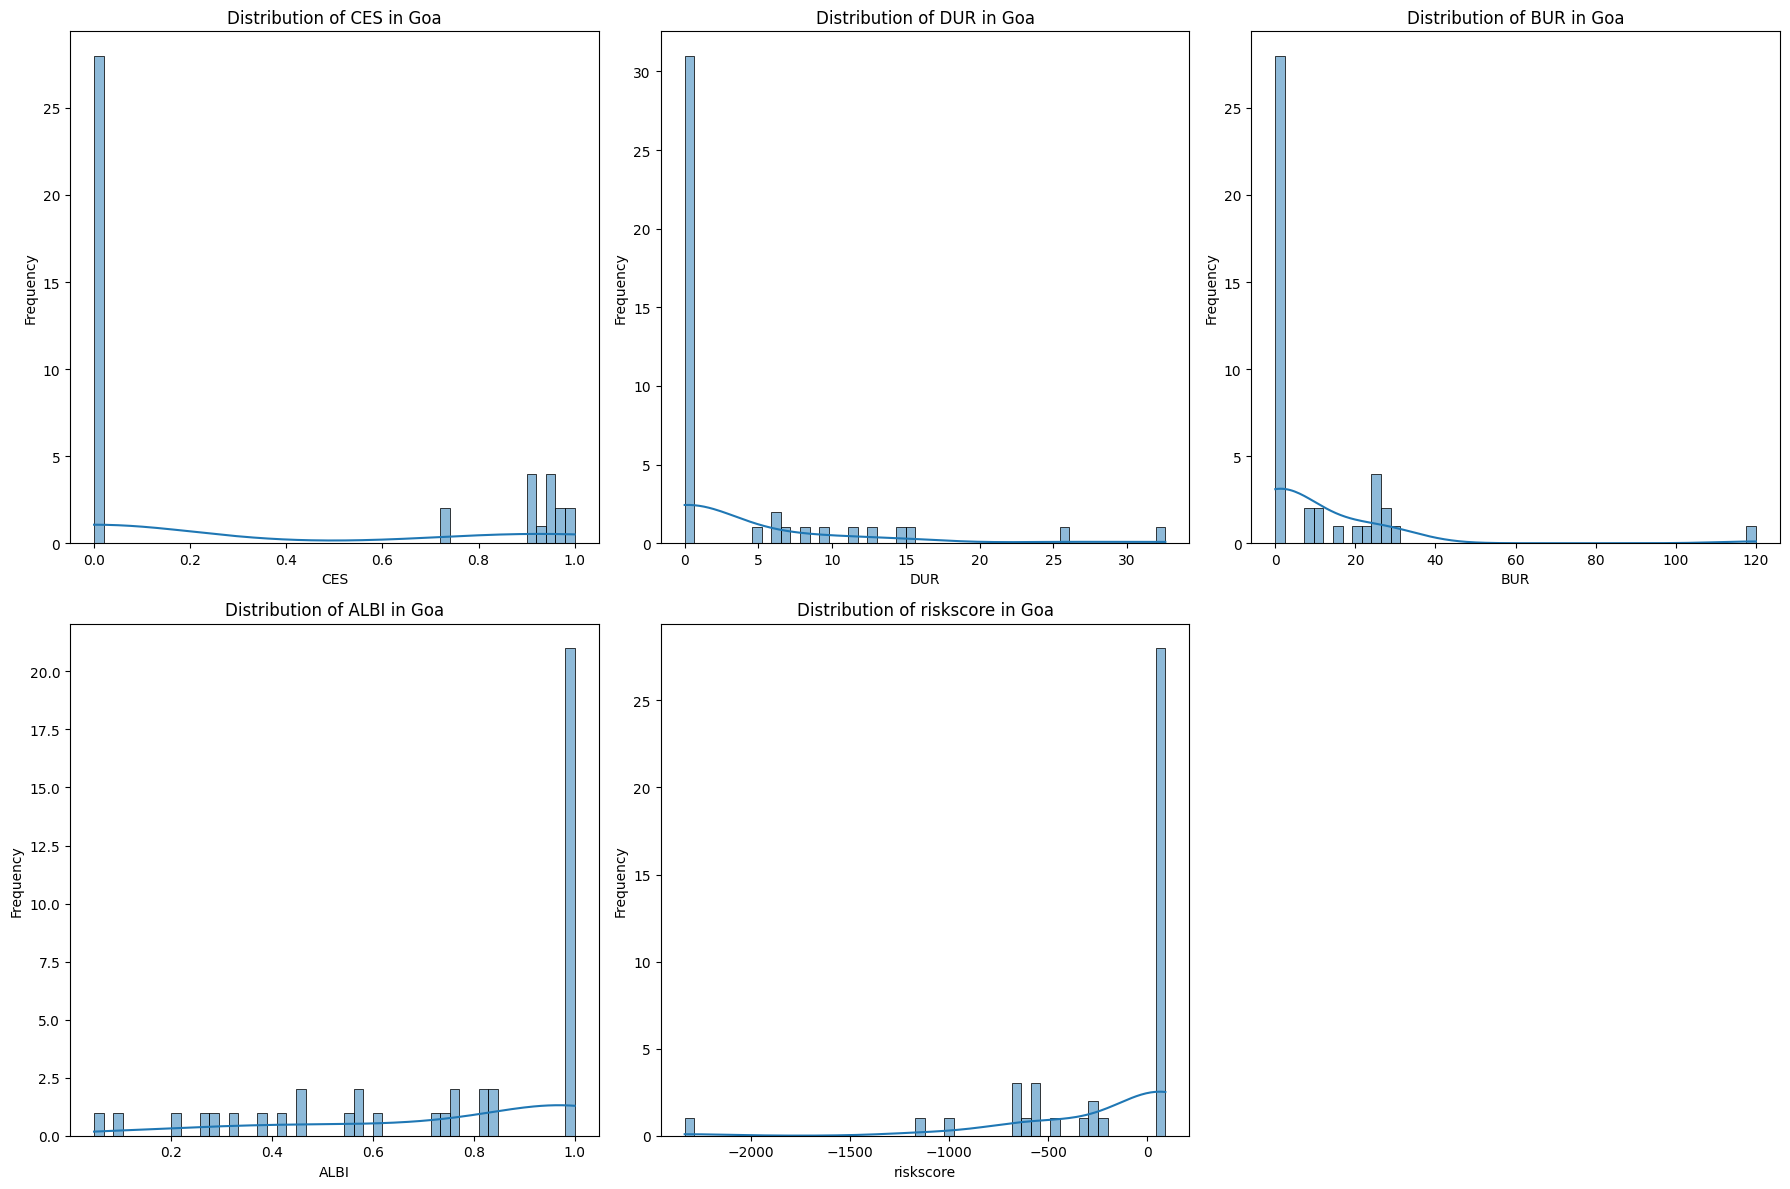

Histograms for CES, DUR, BUR, ALBI, and riskscore in df_go_agg displayed.


In [124]:
# 3. Histograms for performance metrics in df_go_agg
metrics_to_plot_goa = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

plt.figure(figsize=(18, 12)) # Set figure size to (18, 12)
for i, metric in enumerate(metrics_to_plot_goa):
    plt.subplot(2, 3, i + 1) # Arrange plots in a 2x3 grid
    sns.histplot(df_go_agg[metric], bins=50, kde=True)
    plt.title(f'Distribution of {metric} in Goa')
    plt.xlabel(metric)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

print("Histograms for CES, DUR, BUR, ALBI, and riskscore in df_go_agg displayed.")

In [125]:
import pandas as pd

# 1. Find the latest year and month
latest_year = df_go_agg['year'].max()
latest_month = df_go_agg[df_go_agg['year'] == latest_year]['month'].max()

print(f"Latest reporting period: Year {latest_year}, Month {latest_month}")

# 2. Filter df_go_agg for the latest year and month
df_latest_month = df_go_agg[(df_go_agg['year'] == latest_year) & (df_go_agg['month'] == latest_month)].copy()

# Metrics to analyze
metrics = ['CES', 'DUR', 'BUR', 'ALBI', 'riskscore']

# 3. For each metric, print top and bottom districts
for metric in metrics:
    print(f"\n--- Metric: {metric} ---")

    # Top districts
    # For riskscore, top implies highest risk (descending)
    # For ALBI, top implies best balance (descending)
    # For CES, DUR, BUR, top implies best performance (descending)
    top_districts = df_latest_month.sort_values(by=metric, ascending=False)
    print(f"\nTop Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(top_districts[['district', metric]].to_string(index=False))

    # Bottom districts
    # For riskscore, bottom implies lowest risk (ascending)
    # For ALBI, bottom implies least balance (ascending)
    # For CES, DUR, BUR, bottom implies worst performance (ascending)
    bottom_districts = df_latest_month.sort_values(by=metric, ascending=True)
    print(f"\nBottom Districts by {metric} (Year {latest_year}, Month {latest_month}):")
    print(bottom_districts[['district', metric]].to_string(index=False))

Latest reporting period: Year 2026, Month 1

--- Metric: CES ---

Top Districts by CES (Year 2026, Month 1):
 district      CES
South Goa 0.916667
North Goa 0.723684
   Bardez 0.000000

Bottom Districts by CES (Year 2026, Month 1):
 district      CES
   Bardez 0.000000
North Goa 0.723684
South Goa 0.916667

--- Metric: DUR ---

Top Districts by DUR (Year 2026, Month 1):
 district      DUR
South Goa 7.150000
North Goa 4.828947
   Bardez 0.000000

Bottom Districts by DUR (Year 2026, Month 1):
 district      DUR
   Bardez 0.000000
North Goa 4.828947
South Goa 7.150000

--- Metric: BUR ---

Top Districts by BUR (Year 2026, Month 1):
 district       BUR
North Goa 10.828947
South Goa  7.850000
   Bardez  0.000000

Bottom Districts by BUR (Year 2026, Month 1):
 district       BUR
   Bardez  0.000000
South Goa  7.850000
North Goa 10.828947

--- Metric: ALBI ---

Top Districts by ALBI (Year 2026, Month 1):
 district     ALBI
   Bardez 1.000000
South Goa 0.212917
North Goa 0.048287

Bottom Distr

## Summary (Goa):

The Aadhaar lifecycle analysis for Goa provides a detailed view of enrolment and update activities across its districts. The `df_go_agg` dataset, aggregated by month and district, forms the foundation for evaluating key performance indicators.

### Key Observations:

1.  **Data Integration and Preprocessing**: Initial datasets for enrolment, demographic updates, and biometric updates were successfully loaded, their 'date' columns converted to datetime objects, and merged into a single `df_merged_goa` DataFrame. Missing numerical values resulting from the outer merge were imputed with 0.

2.  **Derived Metrics**: Essential metrics such as `totalenrolments`, `childenrolments`, `totaldemoupdates`, and `totalbioupdates` were calculated. From these, `CES` (Child Enrolment Score), `DUR` (Demographic Update Rate), and `BUR` (Biometric Update Rate) were computed, with appropriate handling for division by zero.

3.  **Normalization and ALBI**: Min-max normalization was applied to `totalenrolments`, `totaldemoupdates`, and `totalbioupdates` to create `Enorm`, `Dnorm`, and `Bnorm`. These normalized values were used to compute `stdnorm` and the `ALBI` (Aadhaar Lifecycle Balance Index), which reflects the balance between enrolment and update activities. ALBI values were clipped between 0 and 1.

4.  **Risk Score**: A `riskscore` was calculated by combining risk-normalized versions of the key metrics, scaled from 0 to 100. Similar to other states analyzed, some negative risk scores were observed, indicating a potential issue with the metric's definition or calculation that needs further review to ensure interpretability and actionability.

5.  **Monthly Trends**: Time-series plots for total enrolments, demographic updates, and biometric updates highlighted monthly fluctuations, suggesting periods of varying activity levels or specific campaigns/reporting cycles.

6.  **District Performance (Latest Reporting Period: Year 2026, Month 1)**:
    *   **CES (Child Enrolment Score)**: South Goa (0.917) and North Goa (0.724) show high child enrolment activity relative to total enrolments. Bardez (0.0) had no child enrolments reported in this period.
    *   **DUR (Demographic Update Rate)**: South Goa (7.150) and North Goa (4.829) demonstrated the highest demographic update rates, while Bardez (0.0) had no demographic updates for the month.
    *   **BUR (Biometric Update Rate)**: North Goa (10.829) and South Goa (7.850) had the highest biometric update rates, with Bardez (0.0) showing no biometric updates.
    *   **ALBI (Aadhaar Lifecycle Balance Index)**: Bardez (1.0) exhibited a perfect balance. South Goa (0.213) and North Goa (0.048) had lower ALBI values, indicating less balance between enrolment and update activities.
    *   **Risk Score**: Bardez (80.0) had a positive risk score. However, North Goa (-248.597) and South Goa (-238.381) displayed significant negative risk scores, reinforcing the observation across other states that this metric needs re-evaluation for consistency and interpretability.

7.  **Clustering Analysis**: KMeans clustering successfully grouped districts into distinct clusters based on their CES, DUR, and BUR metrics, visualized via PCA. This highlights different operational profiles and performance levels across Goa's districts.

### Insights or Next Steps

*   **Risk Score Refinement**: The persistent negative values for the `riskscore` for North Goa and South Goa, similar to other states, indicate a need for critical review and recalculation of this metric to ensure it provides actionable and interpretable insights within a standard range (e.g., 0-100).
*   **Investigate Zero Activity Districts**: Districts like Bardez showing 0.0 for CES, DUR, and BUR, yet a perfect ALBI and positive risk score, warrant further investigation. This discrepancy might suggest periods of inactivity or reporting gaps that need to be understood to ensure comprehensive Aadhaar lifecycle management.
*   **Targeted Interventions**: Utilize the clustering analysis to identify districts that consistently underperform in specific metrics (e.g., low DUR/BUR) despite showing high CES. Tailored interventions can then be implemented to address these specific deficiencies and improve the overall Aadhaar lifecycle management in Goa.